In [3]:
import pandas as pd
from IPython.display import display
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# train_data = pd.read_csv('train.csv')

df_train = pd.read_csv('train.csv')

df_train.columns

# X = train_data[['MSSubClass','LotFrontage','LotArea']]
# y = train_data['SalePrice']

# X = X.fillna(0)

# test_data = pd.read_csv('test.csv')
# z = test_data[['MSSubClass','LotFrontage','LotArea']]

# z = z.fillna(0)

# 1460 rows × 80 columns
# model = DecisionTreeClassifier()
# model.fit(X, y)
# predictions = model.predict(z)
# predictions

# train_data['MSZoning'].value_counts()

# df = pd.read_csv('music.csv')
# X = df.drop(columns=['genre'])
# y = df['genre']

# model = DecisionTreeClassifier()
# model.fit(X, y)
# predictions = model.predict([[21, 1], [22, 0]])
# predictions

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


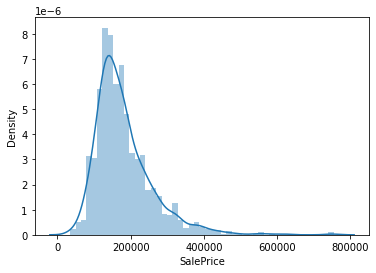

In [6]:
#histogram
sns.distplot(df_train['SalePrice']);

In [7]:
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

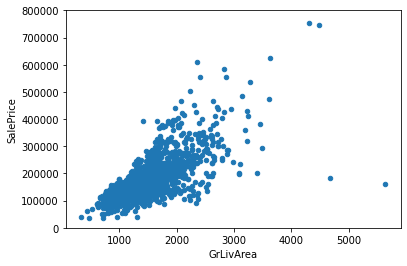

In [8]:
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

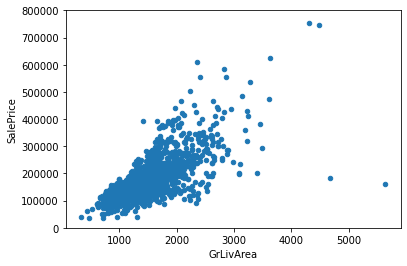

In [9]:
df_train.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

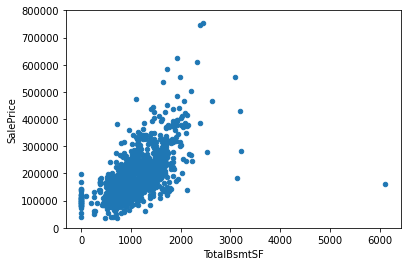

In [10]:
df_train.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0, 800000))

(-0.5, 9.5, -1105.0, 800000.0)

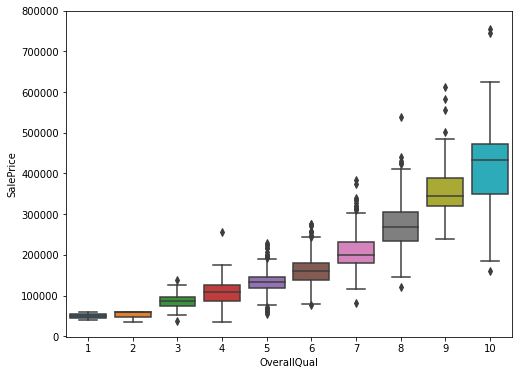

In [11]:
plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x="OverallQual", y="SalePrice", data=df_train)
fig.axis(ymax=800000)

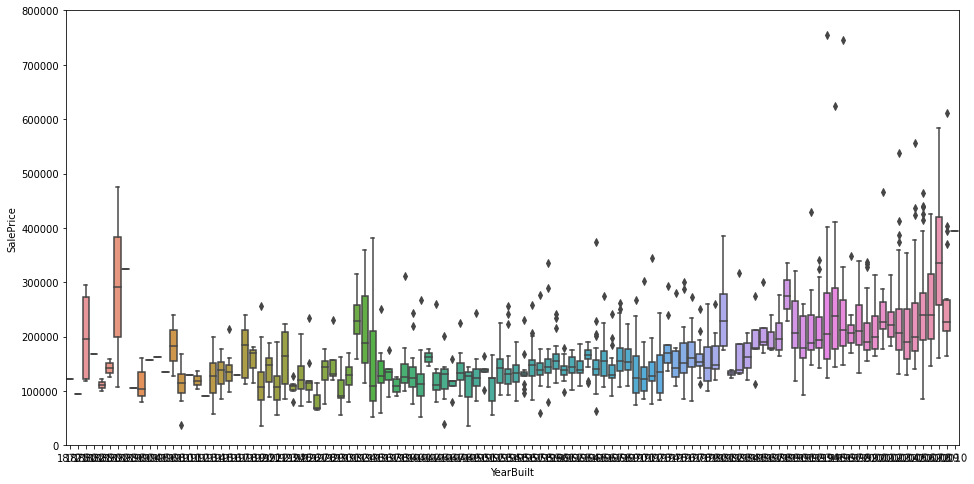

In [12]:
plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x="YearBuilt", y="SalePrice", data=df_train)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=1);

<AxesSubplot:>

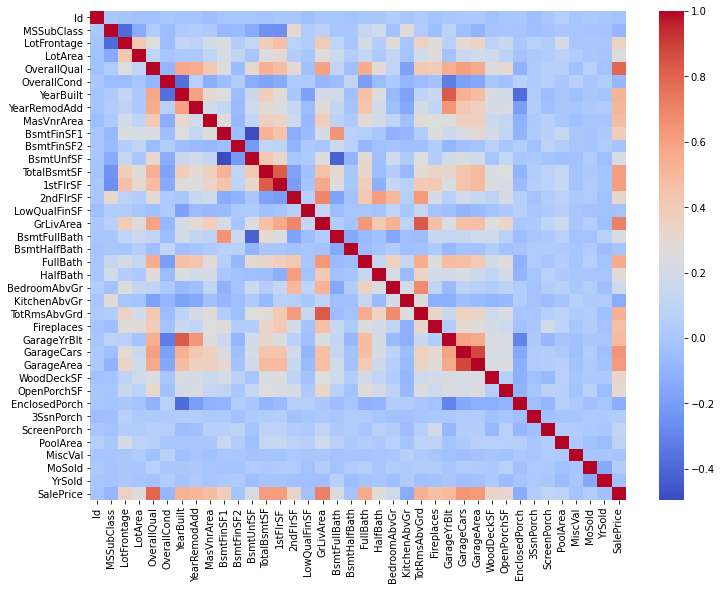

In [13]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(df_train.corr(), cmap = "coolwarm")

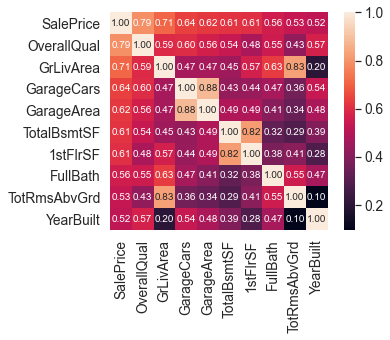

In [14]:
import numpy as np

k = 10
corrmat = df_train.corr()
corrmat
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot = True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

<AxesSubplot:>

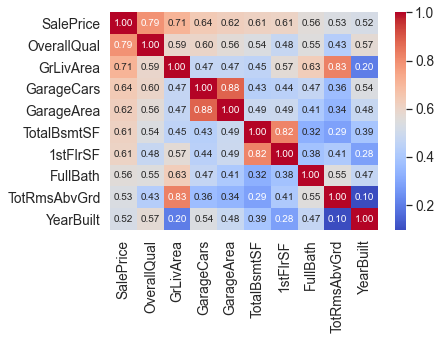

In [15]:
#same as above heatmap, but much faster and easier to use seaborn than matlib or numpy
sns.heatmap(df_train[cols].corr(),annot=True, cmap = "coolwarm", fmt='.2f',annot_kws={'size': 10})

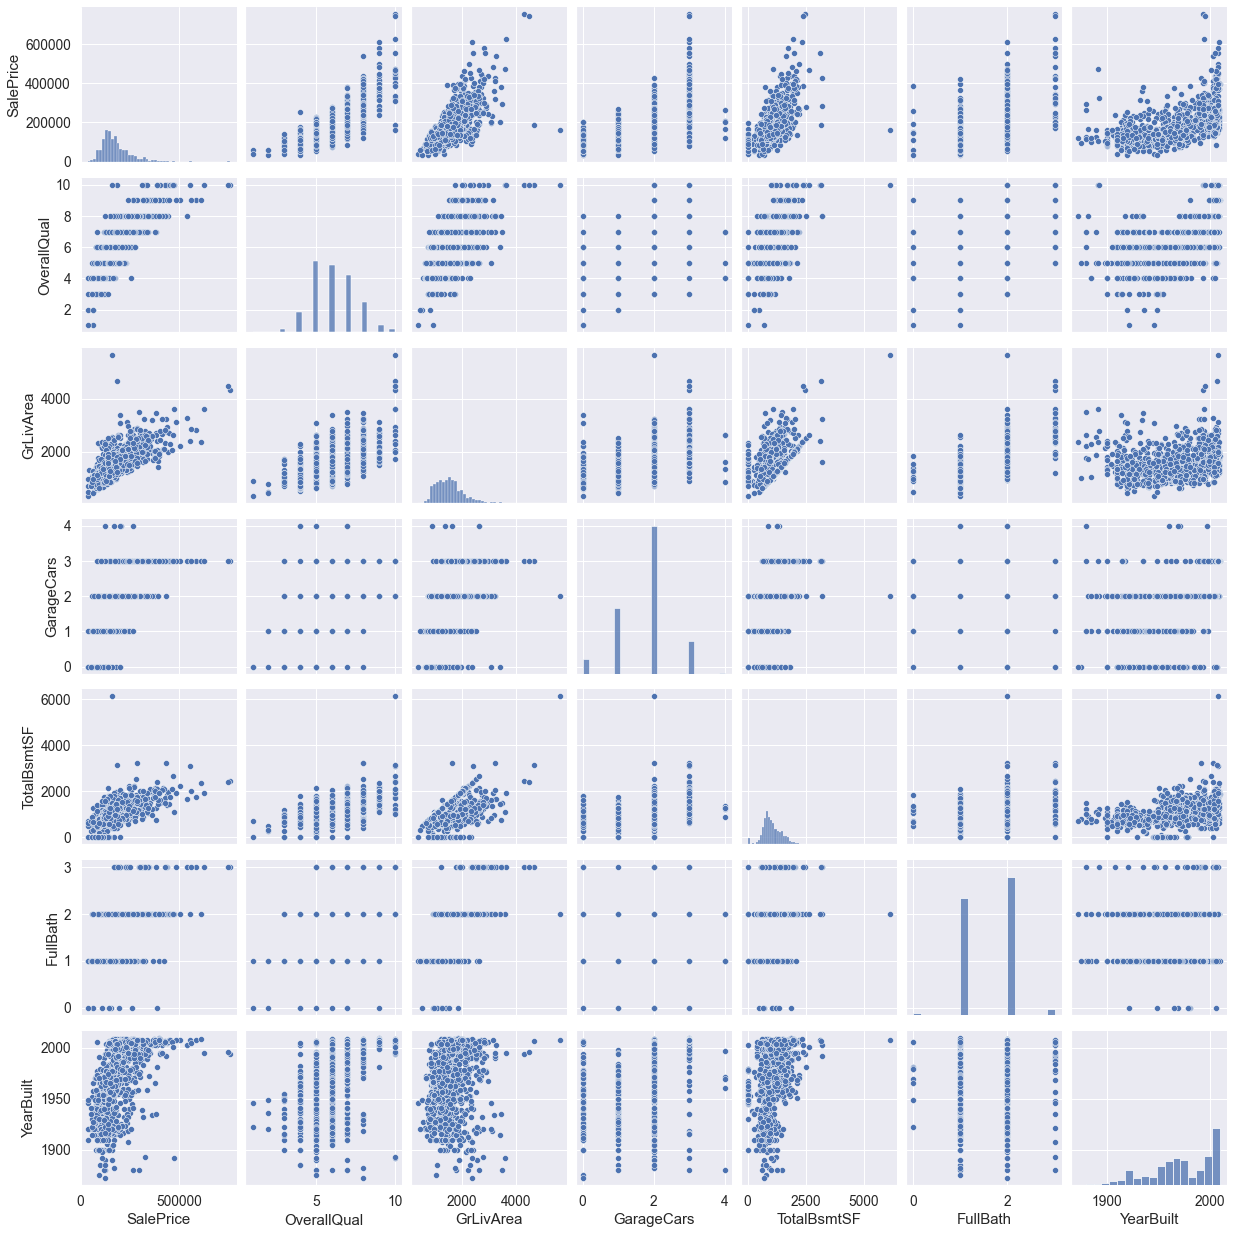

In [16]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], height= 2.5)
plt.show()

In [30]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis = 1, keys=['Total', 'Percent'])
missing_data.head(20)

Total   Percent
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
FireplaceQu     690  0.472603
LotFrontage     259  0.177397
GarageYrBlt      81  0.055479
GarageCond       81  0.055479
GarageType       81  0.055479
GarageFinish     81  0.055479
GarageQual       81  0.055479
BsmtFinType2     38  0.026027
BsmtExposure     38  0.026027
BsmtQual         37  0.025342
BsmtCond         37  0.025342
BsmtFinType1     37  0.025342
MasVnrArea        8  0.005479
MasVnrType        8  0.005479
Electrical        1  0.000685
Id                0  0.000000

In [31]:
df_train_cleaned = df_train.drop((missing_data[missing_data['Total'] >  1]).index,1)
df_train_cleaned = df_train_cleaned.drop(df_train_cleaned[df_train_cleaned['Electrical'].isnull()].index)
df_train_cleaned.isnull().sum().max()


0

In [32]:
from sklearn.preprocessing import StandardScaler
saleprice_scaled = StandardScaler().fit_transform(df_train_cleaned['SalePrice'][:,np.newaxis])
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()] [:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


<ipython-input-32-f97ec5b8fa94>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  saleprice_scaled = StandardScaler().fit_transform(df_train_cleaned['SalePrice'][:,np.newaxis])


In [20]:
df_train_cleaned.sort_values(by = 'GrLivArea', ascending = False)[:2]['GrLivArea']

df_train_cleaned = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train_cleaned = df_train.drop(df_train[df_train['Id'] == 524].index)

In [33]:
df_train_cleaned

Id  MSSubClass MSZoning  LotArea Street LotShape LandContour  \
0        1          60       RL     8450   Pave      Reg         Lvl   
1        2          20       RL     9600   Pave      Reg         Lvl   
2        3          60       RL    11250   Pave      IR1         Lvl   
3        4          70       RL     9550   Pave      IR1         Lvl   
4        5          60       RL    14260   Pave      IR1         Lvl   
...    ...         ...      ...      ...    ...      ...         ...   
1455  1456          60       RL     7917   Pave      Reg         Lvl   
1456  1457          20       RL    13175   Pave      Reg         Lvl   
1457  1458          70       RL     9042   Pave      Reg         Lvl   
1458  1459          20       RL     9717   Pave      Reg         Lvl   
1459  1460          20       RL     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0       AllPub    Inside       Gtl  ...             0         0           0   
1       AllPub       FR2       Gtl  ...             0         0           0   
2       AllPub    Inside       Gtl  ...             0         0           0   
3       AllPub    Corner       Gtl  ...           272         0           0   
4       AllPub       FR2       Gtl  ...             0         0           0   
...        ...       ...       ...  ...           ...       ...         ...   
1455    AllPub    Inside       Gtl  ...             0         0           0   
1456    AllPub    Inside       Gtl  ...             0         0           0   
1457    AllPub    Inside       Gtl  ...             0         0           0   
1458    AllPub    Inside       Gtl  ...           112         0           0   
1459    AllPub    Inside       Gtl  ...             0         0           0   

     PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0           0       0       2    2008        WD         Normal    208500  
1           0       0       5    2007        WD         Normal    181500  
2           0       0       9    2008        WD         Normal    223500  
3           0       0       2    2006        WD        Abnorml    140000  
4           0       0      12    2008        WD         Normal    250000  
...       ...     ...     ...     ...       ...            ...       ...  
1455        0       0       8    2007        WD         Normal    175000  
1456        0       0       2    2010        WD         Normal    210000  
1457        0    2500       5    2010        WD         Normal    266500  
1458        0       0       4    2010        WD         Normal    142125  
1459        0       0       6    2008        WD         Normal    147500  

[1459 rows x 63 columns]

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


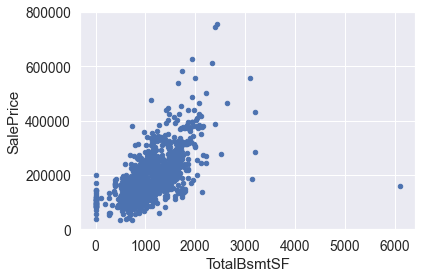

In [34]:
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


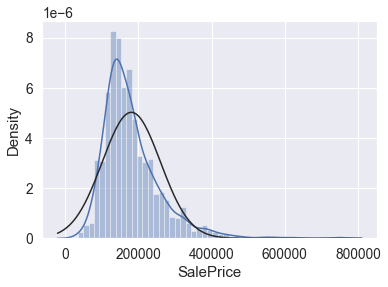

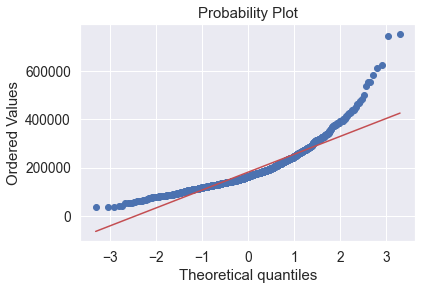

In [23]:
from scipy.stats import norm
from scipy import stats
sns.distplot(df_train_cleaned['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train_cleaned['SalePrice'], plot=plt)

In [35]:
df_train_cleaned['SalePrice'] = np.log(df_train['SalePrice'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


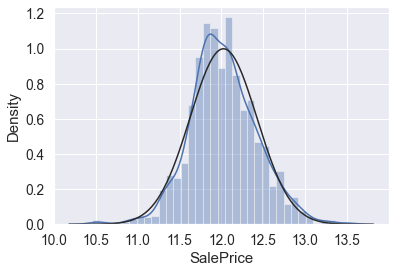

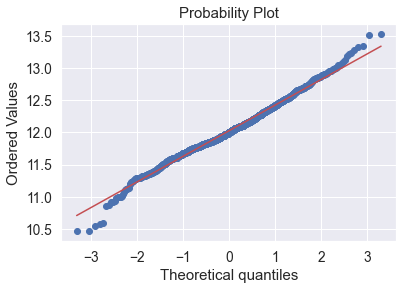

In [36]:
sns.distplot(df_train_cleaned['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train_cleaned['SalePrice'], plot=plt)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


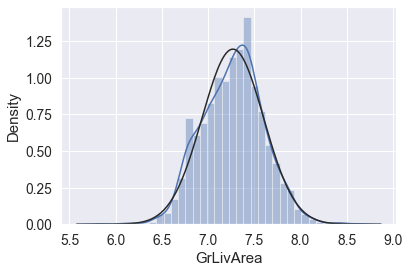

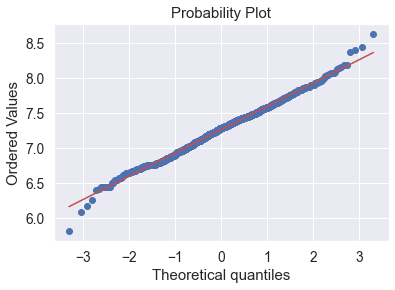

In [37]:
df_train_cleaned['GrLivArea'] = np.log(df_train['GrLivArea'])
sns.distplot(df_train_cleaned['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train_cleaned['GrLivArea'], plot=plt)

In [40]:
df_train_cleaned['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)


In [41]:
df_train_cleaned['HasBsmt'] = 0

In [43]:
df_train_cleaned.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1
df_train_cleaned.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])
sns.distplot(df_train_cleaned[df_train_cleaned['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train_cleaned[df_train_cleaned['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


KeyError: 'HasBsmt'

In [ ]:
plt.scatter(df_train_cleaned['GrLivArea'], df_train_cleaned['SalePrice']);

In [ ]:
plt.scatter(df_train_cleaned[df_train_cleaned['TotalBsmtSF']>0]['TotalBsmtSF'], df_train_cleaned[df_train_cleaned['TotalBsmtSF']>0]['SalePrice']);

In [ ]:

df_train = pd.get_dummies(df_train_cleaned)
df_train

In [45]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]